<a href="https://colab.research.google.com/github/sunshineluyao/CV_ML/blob/master/Kmeans/Robust60/BTC_Robustness_Clustering60.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
###show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/sunshineluyao/Fintech_AI/master/data/btc_Kmeans_robust180_2020_07_05.csv')
df.head()

,Unnamed: 0,BlkCnt,IssTotNtv,SplyCur,TxTfrValAdjUSD,CapMrktCurUSD,NVTAdj90,PriceUSD,FeeTotUSD,IssTotUSD,AdrActCnt,Volume,Type,Annualized_DilutionRate,Total daily transaction volume,Velocity,The daily revenue of bitcoin miners,The accumulated revenue of bitcoin miners,P/E Ratio,Metcalfe,PM,<1year,1-2year,2-3year,3-5year,>5year,One-year staking ratio,Two-year staking ratio,Three-year staking ratio,Five-year staking ratio,Token Utility,PU Ratio,volatility30,volatility60,volatility90,volatility180,PU_future90d,NVTAdj90_future90d,PM_future90d,PriceChange30d,PriceChange60d,PriceChange90d,PriceChange180d,future30d_ROI,future60d_ROI,future90d_ROI,future180d_ROI,PU_future180d,NVT_future180d,PM_future180d
0,2009-01-03,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-04,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-05,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-06,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-07,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#set "date" column as the index
df.set_index('Unnamed: 0', inplace=True)
#to remove the name of the index
df.index.name=None
df.tail()

,BlkCnt,IssTotNtv,SplyCur,TxTfrValAdjUSD,CapMrktCurUSD,NVTAdj90,PriceUSD,FeeTotUSD,IssTotUSD,AdrActCnt,Volume,Type,Annualized_DilutionRate,Total daily transaction volume,Velocity,The daily revenue of bitcoin miners,The accumulated revenue of bitcoin miners,P/E Ratio,Metcalfe,PM,<1year,1-2year,2-3year,3-5year,>5year,One-year staking ratio,Two-year staking ratio,Three-year staking ratio,Five-year staking ratio,Token Utility,PU Ratio,volatility30,volatility60,volatility90,volatility180,PU_future90d,NVTAdj90_future90d,PM_future90d,PriceChange30d,PriceChange60d,PriceChange90d,PriceChange180d,future30d_ROI,future60d_ROI,future90d_ROI,future180d_ROI,PU_future180d,NVT_future180d,PM_future180d
2020-06-28,150.0,937.50,1.841734e+07,1.044929e+09,1.677464e+11,84.965505,9108.065675,178764.564868,8.538812e+06,686270.0,1.456087e+10,BTC,1.883975,1.560580e+10,21.670843,8.717576e+06,1.854689e+10,52.718677,4.709665e+11,1.933909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027537,0.031297,0.033409,0.033409,NaN,NaN,NaN,-3.438650,3.951551,41.497578,27.076373,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-29,145.0,906.25,1.841825e+07,1.825444e+09,1.691578e+11,85.628193,9184.247366,308429.074080,8.323224e+06,962232.0,1.646055e+10,BTC,1.879341,1.828599e+10,21.383505,8.631653e+06,1.855552e+10,53.691440,9.258904e+11,0.991937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027077,0.031259,0.033407,0.033407,NaN,NaN,NaN,-5.235760,6.146684,42.781408,28.081423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-30,147.0,918.75,1.841917e+07,2.063592e+09,1.684243e+11,84.979256,9143.967585,407570.997824,8.401020e+06,926238.0,1.573580e+10,BTC,1.878009,1.779939e+10,21.318103,8.808591e+06,1.856433e+10,52.384807,8.579168e+11,1.065834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026666,0.031133,0.033284,0.033284,NaN,NaN,NaN,-3.073754,3.257085,37.645885,31.628006,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-01,162.0,1012.50,1.842018e+07,2.197590e+09,1.702271e+11,85.716151,9241.339612,573024.429645,9.356856e+06,1078007.0,1.597155e+10,BTC,1.889464,1.816914e+10,20.887828,9.929881e+06,1.857426e+10,46.966900,1.162099e+12,0.795228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021887,0.031114,0.033233,0.033233,NaN,NaN,NaN,-9.390948,2.941402,36.047259,26.328760,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.633892e+10,BTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.018210,0.031087,0.033219,0.033219,NaN,NaN,NaN,-2.849002,3.872675,36.870157,25.849557,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import matplotlib.pyplot as plt
print(plt.style.available)
####Check different styles here: https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
plt.style.use('seaborn-bright')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [ ]:
df['PU_future60d']=df['PU Ratio'].shift(-60)
df['NVT_future60d']=df['NVTAdj90'].shift(-60)
df['PM_future60d']=df['PM'].shift(-60)


In [ ]:
df_60=df[['PU Ratio','PU_future60d','NVTAdj90','NVT_future60d','future60d_ROI','PM','PM_future60d']]

In [ ]:
df_60=df_60.dropna()

In [ ]:
df_60.head()

,PU Ratio,PU_future60d,NVTAdj90,NVT_future60d,future60d_ROI,PM,PM_future60d
2010-10-15,0.463020,0.846304,154.643925,127.697990,134.942857,30.998689,20.276851
2010-10-16,0.418576,0.790610,144.681892,123.638562,137.623762,11.602674,20.538081
2010-10-17,0.434648,0.848591,147.263082,128.368660,145.058824,18.085074,27.464631
2010-10-18,0.432816,0.784172,145.972987,124.403714,136.968570,11.418262,38.393389
2010-10-19,0.391168,0.753379,137.869691,122.980495,147.065731,4.899486,31.191718


In [ ]:
df_60.tail()

,PU Ratio,PU_future60d,NVTAdj90,NVT_future60d,future60d_ROI,PM,PM_future60d
2020-01-23,32.357123,12.172811,86.503052,61.315945,-22.470590,1.341353,1.455861
2020-01-24,33.296773,13.134281,87.661535,63.573657,-19.568525,1.624652,1.249921
2020-01-25,32.873474,12.582958,87.176746,62.632848,-19.830441,1.881499,1.938508
2020-01-26,34.843963,12.841833,90.787382,63.264534,-21.220446,2.887484,0.853296
2020-01-27,37.409096,11.868722,94.497962,60.623003,-27.085766,1.685565,0.995063


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
### We cluster the data by PU today and after n days
model = KMeans(n_clusters=4, random_state=0)
model.fit(df_60[['PU Ratio','PU_future60d']])
labels60 = model.predict(df_60[['PU Ratio','PU_future60d']])
labels60.reshape(-1,1)
df_60['labels60']=labels60
df_60.head()

,PU Ratio,PU_future60d,NVTAdj90,NVT_future60d,future60d_ROI,PM,PM_future60d,labels60
2010-10-15,0.463020,0.846304,154.643925,127.697990,134.942857,30.998689,20.276851,1
2010-10-16,0.418576,0.790610,144.681892,123.638562,137.623762,11.602674,20.538081,1
2010-10-17,0.434648,0.848591,147.263082,128.368660,145.058824,18.085074,27.464631,1
2010-10-18,0.432816,0.784172,145.972987,124.403714,136.968570,11.418262,38.393389,1
2010-10-19,0.391168,0.753379,137.869691,122.980495,147.065731,4.899486,31.191718,1


In [ ]:
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
centroids=pd.DataFrame(centroids)
centroids.columns=['centroids_x','centroids_y']
centroids.head()

,centroids_x,centroids_y
0,98.825756,97.112594
1,18.277702,19.061443
2,444.836885,111.437276
3,99.627462,439.204960


In [ ]:
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1008x720 with 0 Axes>

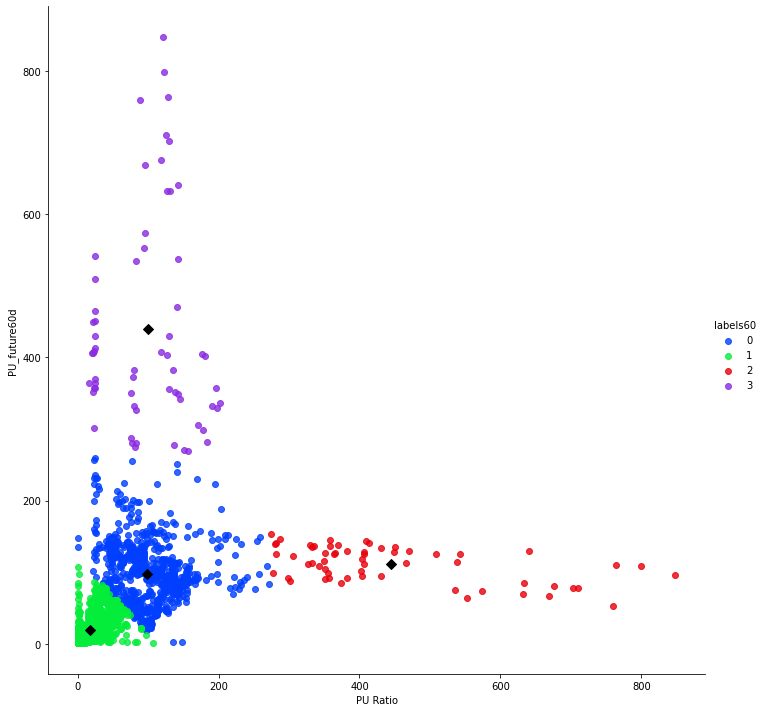

In [23]:
plt.figure(figsize=(14, 10))
sns.lmplot('PU Ratio', 'PU_future60d', data=df_60, hue='labels60', fit_reg=False, legend=True,size=10)
plt.scatter(centroids_x, centroids_y, marker='D', s=50, color='black')
plt.savefig('PU60_full')

In [24]:
df_60_ROI=df_60[['future60d_ROI','labels60']].groupby('labels60', as_index=False).agg(['min', 'max','mean','std'])
df_60_ROI.columns = ["_".join(x) for x in df_60_ROI.columns.ravel()]
df_60_ROI.index.name=None
df_60_ROI.head()

,future60d_ROI_min,future60d_ROI_max,future60d_ROI_mean,future60d_ROI_std
0,-72.993433,3854.704094,27.074604,211.689726
1,-80.651775,3022.836529,57.034190,198.101769
2,-59.784966,20.531380,-25.633132,19.805913
3,91.156702,834.920849,300.810466,238.209134


In [25]:
df60_PU=df_60[['PU Ratio', 'PU_future60d','labels60']].groupby('labels60').agg(['min', 'max','mean','std'])
df60_PU=df60_PU.transpose()
df60_PU

labels60                    0           1           2           3
PU Ratio     min     0.686449    0.331285  274.294364   16.025319
             max   271.159673  106.712495  848.128885  201.440103
             mean   98.825756   18.277702  444.836885   99.627462
             std    42.649648   16.296131  148.836508   57.197275
PU_future60d min     1.739404    0.331285   52.141711  269.334754
             max   259.290818  106.712495  153.641104  848.128885
             mean   97.112594   19.061443  111.437276  439.204960
             std    44.258792   16.639015   24.506832  149.643526

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1008x720 with 0 Axes>

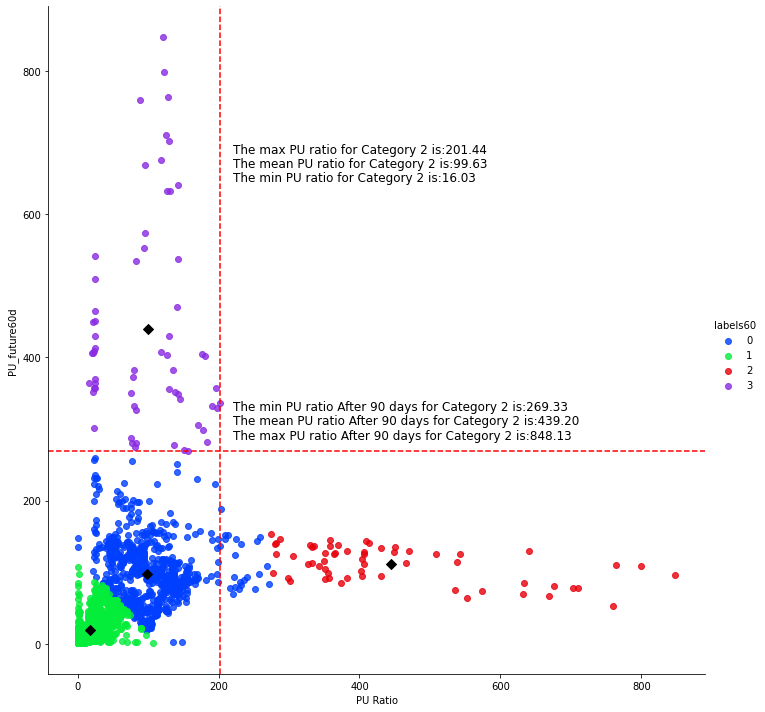

In [31]:
plt.figure(figsize=(14, 10))
sns.lmplot('PU Ratio', 'PU_future60d', data=df_60, hue='labels60', fit_reg=False, legend=True,size=10)
plt.scatter(centroids_x, centroids_y, marker='D', s=50, color='black')
plt.axvline(201.44, color='red', linestyle='--')
plt.axhline(269.33, color='red', linestyle='--')
plt.annotate('The max PU ratio for Category 2 is:201.44',
            xy=(220, 700), 
            horizontalalignment='left', verticalalignment='top',fontsize=12)
plt.annotate('The mean PU ratio for Category 2 is:99.63',
            xy=(220, 680), 
            horizontalalignment='left', verticalalignment='top',fontsize=12)
plt.annotate('The min PU ratio for Category 2 is:16.03',
            xy=(220, 660), 
            horizontalalignment='left', verticalalignment='top',fontsize=12)

plt.annotate('The max PU ratio After 90 days for Category 2 is:848.13',
            xy=(220, 300), 
            horizontalalignment='left', verticalalignment='top',fontsize=12)
plt.annotate('The mean PU ratio After 90 days for Category 2 is:439.20',
            xy=(220, 320), 
            horizontalalignment='left', verticalalignment='top',fontsize=12)
plt.annotate('The min PU ratio After 90 days for Category 2 is:269.33',
            xy=(220, 340), 
            horizontalalignment='left', verticalalignment='top',fontsize=12)
plt.savefig('PU90_full_annoted')

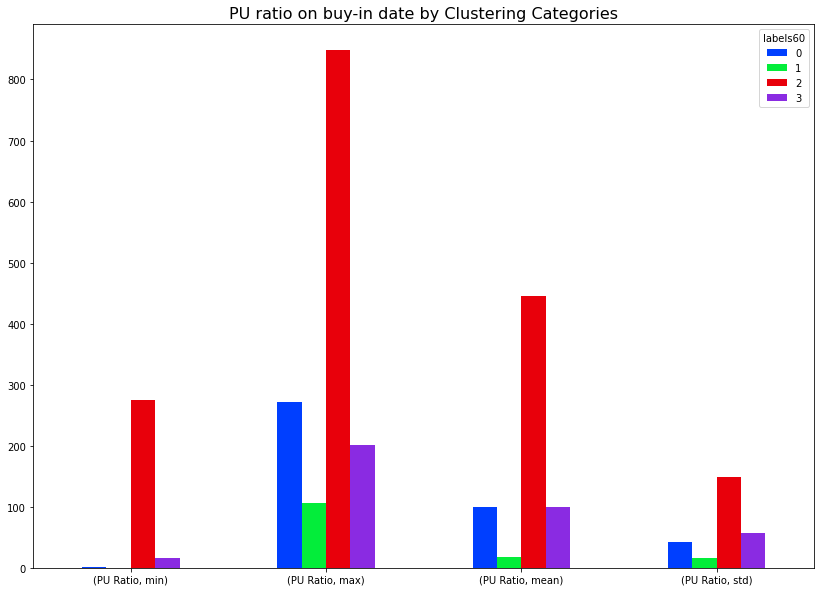

In [26]:
df60_PU.iloc[0:4].plot(kind='bar',figsize=(14, 10))
plt.title('PU ratio on buy-in date by Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('60PU_full_buyin')

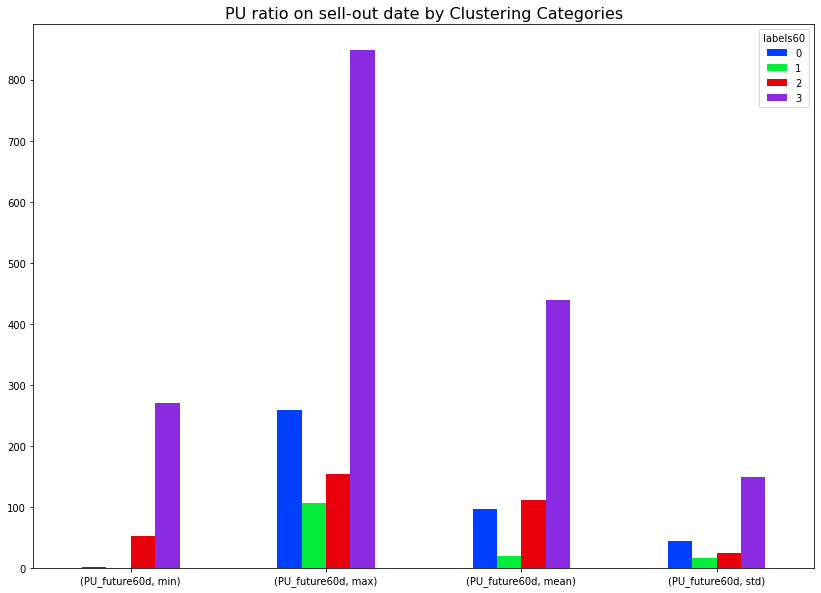

In [27]:
df60_PU.iloc[4:8].plot(kind='bar',figsize=(14, 10))
plt.title('PU ratio on sell-out date by Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('60PU_full_sellout')

In [28]:
df_60_ROI=df_60_ROI.transpose()
df_60_ROI.columns=['labels60=0', 'labels60=1','labels60=2', 'labels60=3']
df_60_ROI.head()

,labels60=0,labels60=1,labels60=2,labels60=3
future60d_ROI_min,-72.993433,-80.651775,-59.784966,91.156702
future60d_ROI_max,3854.704094,3022.836529,20.531380,834.920849
future60d_ROI_mean,27.074604,57.034190,-25.633132,300.810466
future60d_ROI_std,211.689726,198.101769,19.805913,238.209134


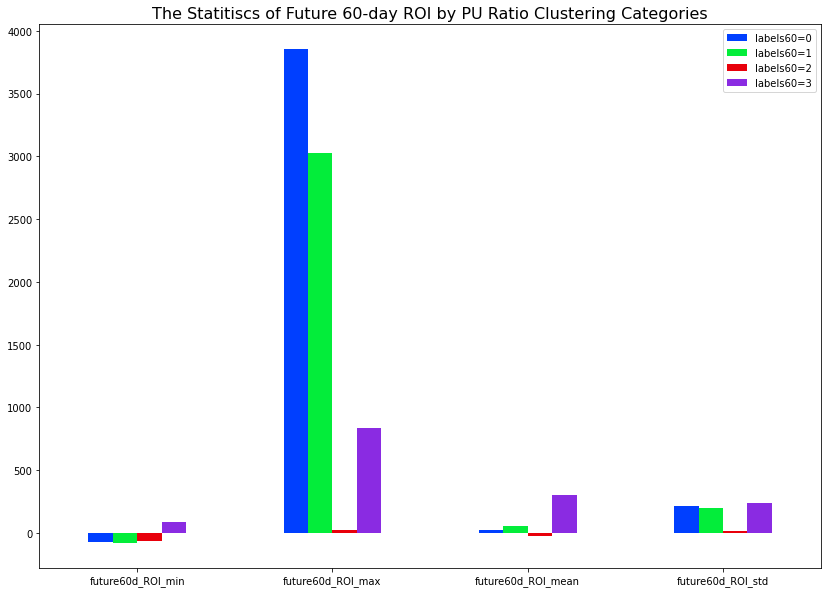

In [29]:
df_60_ROI.plot(kind='bar',figsize=(14, 10))
plt.title('The Statitiscs of Future 60-day ROI by PU Ratio Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('60ROI_full')

In [32]:
df_60.head()

,PU Ratio,PU_future60d,NVTAdj90,NVT_future60d,future60d_ROI,PM,PM_future60d,labels60
2010-10-15,0.463020,0.846304,154.643925,127.697990,134.942857,30.998689,20.276851,1
2010-10-16,0.418576,0.790610,144.681892,123.638562,137.623762,11.602674,20.538081,1
2010-10-17,0.434648,0.848591,147.263082,128.368660,145.058824,18.085074,27.464631,1
2010-10-18,0.432816,0.784172,145.972987,124.403714,136.968570,11.418262,38.393389,1
2010-10-19,0.391168,0.753379,137.869691,122.980495,147.065731,4.899486,31.191718,1


In [33]:
### We cluster the data by NVT today and after n days
model = KMeans(n_clusters=4, random_state=0)
model.fit(df_60[['NVTAdj90','NVT_future60d']])
labels60_NVT = model.predict(df_60[['NVTAdj90','NVT_future60d']])
labels60_NVT.reshape(-1,1)
df_60['labels60_NVT']=labels60_NVT
df_60.head()

,PU Ratio,PU_future60d,NVTAdj90,NVT_future60d,future60d_ROI,PM,PM_future60d,labels60,labels60_NVT
2010-10-15,0.463020,0.846304,154.643925,127.697990,134.942857,30.998689,20.276851,1,1
2010-10-16,0.418576,0.790610,144.681892,123.638562,137.623762,11.602674,20.538081,1,1
2010-10-17,0.434648,0.848591,147.263082,128.368660,145.058824,18.085074,27.464631,1,1
2010-10-18,0.432816,0.784172,145.972987,124.403714,136.968570,11.418262,38.393389,1,1
2010-10-19,0.391168,0.753379,137.869691,122.980495,147.065731,4.899486,31.191718,1,1


In [34]:
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
centroids=pd.DataFrame(centroids)
centroids.columns=['centroids_x','centroids_y']
centroids.head()

,centroids_x,centroids_y
0,42.440936,42.708961
1,176.274494,79.674620
2,71.796194,73.866309
3,122.336008,180.539350


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1008x720 with 0 Axes>

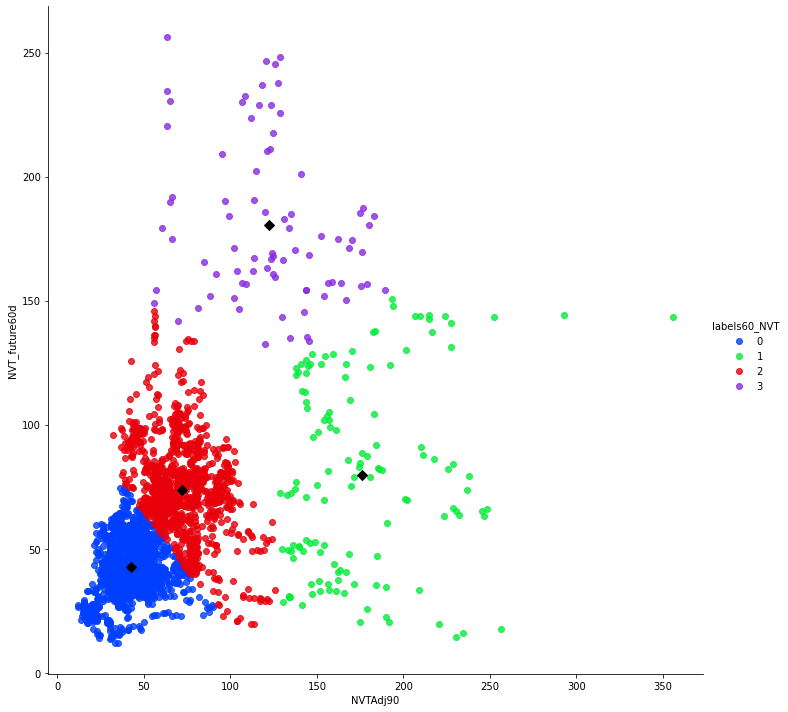

In [36]:
plt.figure(figsize=(14, 10))
sns.lmplot('NVTAdj90', 'NVT_future60d', data=df_60, hue='labels60_NVT', fit_reg=False, legend=True,size=10)
plt.scatter(centroids_x, centroids_y, marker='D', s=50, color='black')
plt.savefig('NVT60_full')

In [37]:
df_60_ROI=df_60[['future60d_ROI','labels60_NVT']].groupby('labels60_NVT', as_index=False).agg(['min', 'max','mean','std'])
df_60_ROI.columns = ["_".join(x) for x in df_60_ROI.columns.ravel()]
df_60_ROI.index.name=None
df_60_ROI.head()

,future60d_ROI_min,future60d_ROI_max,future60d_ROI_mean,future60d_ROI_std
0,-80.651775,417.113760,24.601498,59.815656
1,-72.993433,759.686249,96.529367,131.129605
2,-59.784966,1926.199968,63.882250,219.385030
3,21.771066,3854.704094,532.518894,823.018929


In [38]:
df60_NVT=df_60[['NVTAdj90', 'NVT_future60d','labels60_NVT']].groupby('labels60_NVT').agg(['min', 'max','mean','std'])
df60_NVT=df60_NVT.transpose()
df60_NVT

labels60_NVT                0           1           2           3
NVTAdj90      min   11.810125  128.643757   32.052603   55.854084
              max   89.758464  355.931337  125.725166  189.442369
              mean  42.440936  176.274494   71.796194  122.336008
              std   11.464879   38.467310   15.942217   34.095489
NVT_future60d min   11.810125   14.539792   19.666403  132.630956
              max   74.608385  150.802084  145.973796  256.362055
              mean  42.708961   79.674620   73.866309  180.539350
              std   10.384615   38.923609   18.361119   31.928733

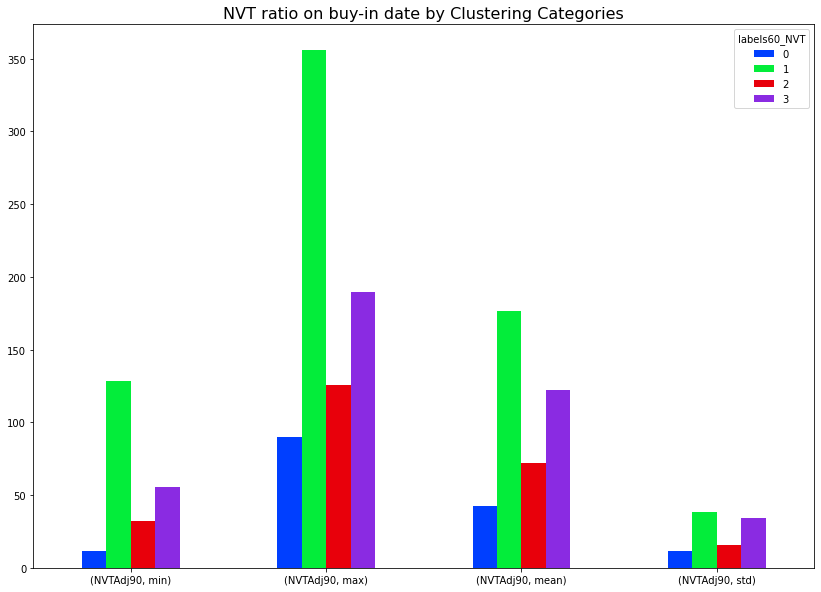

In [39]:
df60_NVT.iloc[0:4].plot(kind='bar',figsize=(14, 10))
plt.title('NVT ratio on buy-in date by Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('60NVT_full_buyin')

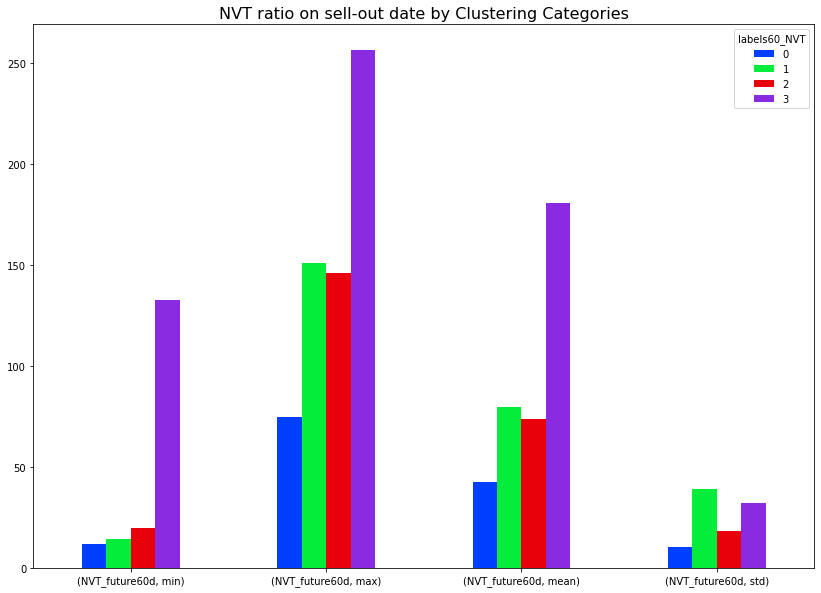

In [40]:
df60_NVT.iloc[4:8].plot(kind='bar',figsize=(14, 10))
plt.title('NVT ratio on sell-out date by Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('60NVT_full_sellout')

In [41]:
df_60_ROI=df_60_ROI.transpose()
df_60_ROI.columns=['labels60_NVT=0', 'labels60_NVT=1','labels60_NVT=2', 'labels60_NVT=3']
df_60_ROI.head()

,labels60_NVT=0,labels60_NVT=1,labels60_NVT=2,labels60_NVT=3
future60d_ROI_min,-80.651775,-72.993433,-59.784966,21.771066
future60d_ROI_max,417.113760,759.686249,1926.199968,3854.704094
future60d_ROI_mean,24.601498,96.529367,63.882250,532.518894
future60d_ROI_std,59.815656,131.129605,219.385030,823.018929


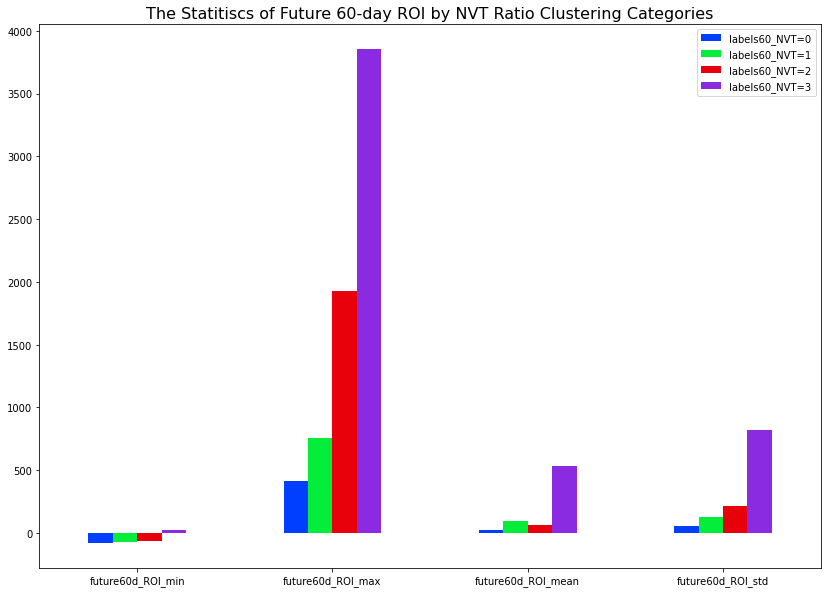

In [42]:
df_60_ROI.plot(kind='bar',figsize=(14, 10))
plt.title('The Statitiscs of Future 60-day ROI by NVT Ratio Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('60ROI_full_NVT')

In [43]:
model = KMeans(n_clusters=4, random_state=0)
model.fit(df_60[['PM','PM_future60d']])
labels60 = model.predict(df_60[['PM','PM_future60d']])
labels60.reshape(-1,1)
df_60['labels60']=labels60
df_60.head()

,PU Ratio,PU_future60d,NVTAdj90,NVT_future60d,future60d_ROI,PM,PM_future60d,labels60,labels60_NVT
2010-10-15,0.463020,0.846304,154.643925,127.697990,134.942857,30.998689,20.276851,2,1
2010-10-16,0.418576,0.790610,144.681892,123.638562,137.623762,11.602674,20.538081,2,1
2010-10-17,0.434648,0.848591,147.263082,128.368660,145.058824,18.085074,27.464631,2,1
2010-10-18,0.432816,0.784172,145.972987,124.403714,136.968570,11.418262,38.393389,2,1
2010-10-19,0.391168,0.753379,137.869691,122.980495,147.065731,4.899486,31.191718,2,1


In [44]:
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
centroids=pd.DataFrame(centroids)
centroids.columns=['centroids_x','centroids_y']
centroids.head()

,centroids_x,centroids_y
0,1.453086,1.361496
1,51.015128,19.308073
2,19.269228,12.267941
3,113.940949,17.614734


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1008x720 with 0 Axes>

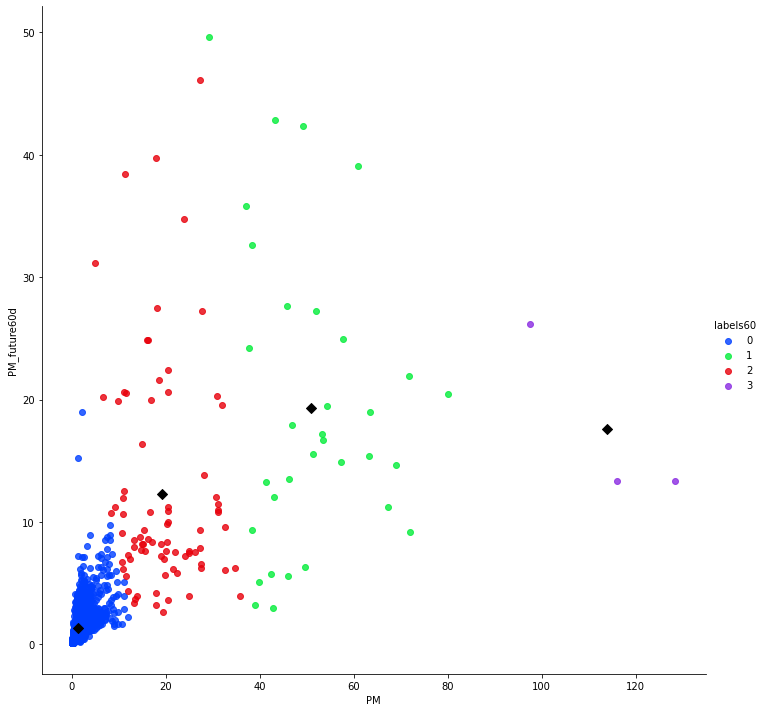

In [45]:
plt.figure(figsize=(14, 10))
sns.lmplot('PM','PM_future60d', data=df_60, hue='labels60', fit_reg=False, legend=True,size=10)
plt.scatter(centroids_x, centroids_y, marker='D', s=50, color='black')
plt.savefig('PM60_full')

In [46]:
df_60_ROI=df_60[['future60d_ROI','labels60']].groupby('labels60', as_index=False).agg(['min', 'max','mean','std'])
df_60_ROI.columns = ["_".join(x) for x in df_60_ROI.columns.ravel()]
df_60_ROI.index.name=None
df_60_ROI.head()

,future60d_ROI_min,future60d_ROI_max,future60d_ROI_mean,future60d_ROI_std
0,-80.651775,3854.704094,49.696183,204.902414
1,-20.036981,350.000000,83.370389,109.451946
2,-27.842464,810.483046,181.336388,139.915602
3,-25.453991,54.798762,17.038612,40.335136


In [47]:
df60_PM=df_60[['PM','PM_future60d','labels60']].groupby('labels60').agg(['min', 'max','mean','std'])
df60_PM=df60_PM.transpose()
df60_PM

labels60                   0          1          2           3
PM           min    0.081659  29.285917   4.899486   97.428060
             max   11.943117  80.100067  35.803533  128.418139
             mean   1.453086  51.015128  19.269228  113.940949
             std    1.413668  12.128364   7.296822   15.595009
PM_future60d min    0.081659   3.010047   2.681570   13.338470
             max   19.008926  49.639999  46.100227   26.154253
             mean   1.361496  19.308073  12.267941   17.614734
             std    1.216260  12.225254   9.048408    7.395443

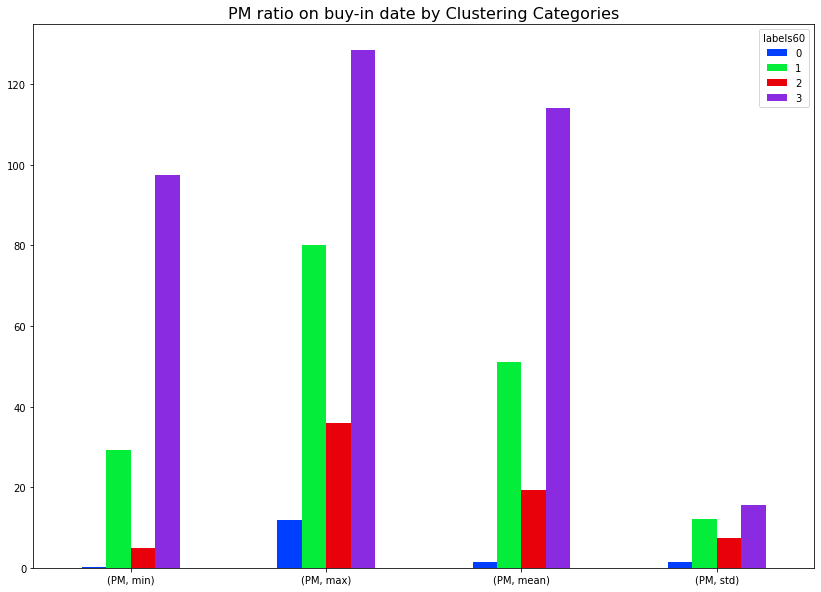

In [49]:
df60_PM.iloc[0:4].plot(kind='bar',figsize=(14, 10))
plt.title('PM ratio on buy-in date by Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('60PM_full_buyin')

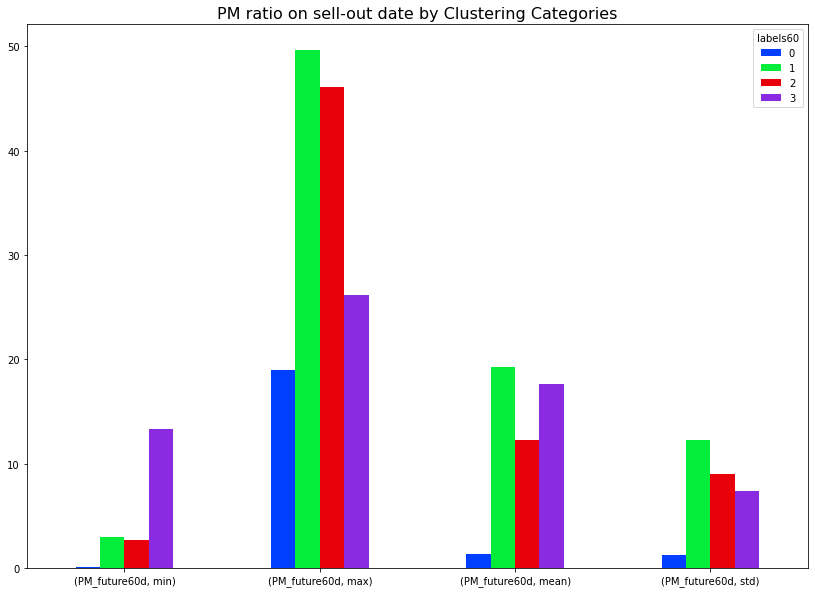

In [50]:
df60_PM.iloc[4:8].plot(kind='bar',figsize=(14, 10))
plt.title('PM ratio on sell-out date by Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('60PM_full_sell-out')

In [51]:
df_60_ROI=df_60_ROI.transpose()
df_60_ROI.columns=['labels60=0', 'labels60=1','labels60=2', 'labels60=3']
df_60_ROI.head()

,labels60=0,labels60=1,labels60=2,labels60=3
future60d_ROI_min,-80.651775,-20.036981,-27.842464,-25.453991
future60d_ROI_max,3854.704094,350.000000,810.483046,54.798762
future60d_ROI_mean,49.696183,83.370389,181.336388,17.038612
future60d_ROI_std,204.902414,109.451946,139.915602,40.335136


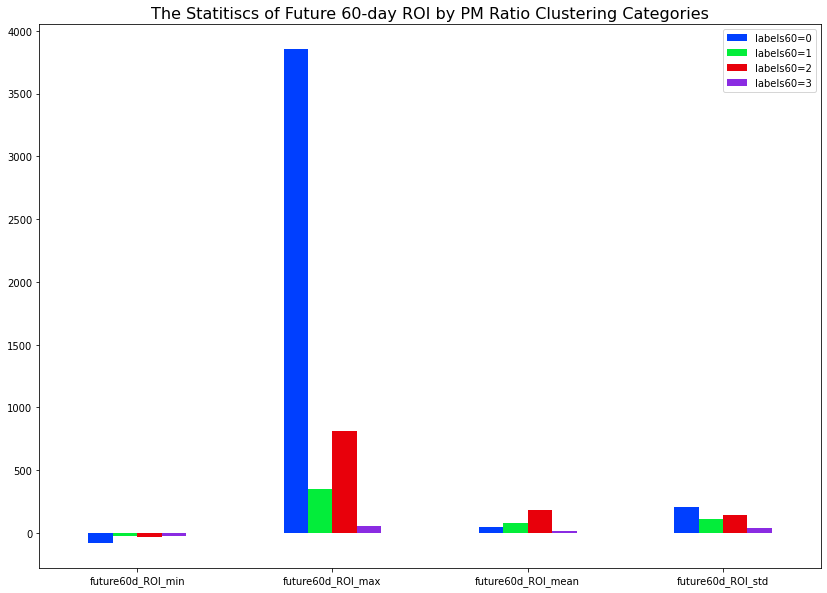

In [52]:
df_60_ROI.plot(kind='bar',figsize=(14, 10))
plt.title('The Statitiscs of Future 60-day ROI by PM Ratio Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('60ROI_fullPM')

In [53]:
df.to_csv('btc_Kmeans_robust60_2020_07_06.csv')